### Correlation between RNA/Protein values, as a correlation plot

In [43]:
import pandas as pd
from lib.E15Analyzer import E15Analyzer
import mygene
mg = mygene.MyGeneInfo()

In [44]:
expr = E15Analyzer.get_expr_values(basedir='../data/20180516_rna_tophat')

In [45]:
prot_bdnf_vs_ctrl = pd.read_csv('../data/limma_CHR_BDNFvsCtrl_TF.csv')
prot_kcl_vs_ctrl = pd.read_excel('../data/limma_CHR_KCLvsCtrl.xlsx') # limma_CHR_BDNF_vs_KCL_.xlsx')

In [46]:
prot_kcl_vs_ctrl

gene_name     logFC    AveExpr         t   P.Value  adj.P.Val         B
0        UBE2O  0.208800  26.211906  2.627414  0.032081   0.173237 -3.820005
1         EGFR  1.177865  19.741879  1.831324  0.106975   0.327242 -4.978725
2        HSPE1  0.242489  28.056795  2.634893  0.031722   0.171806 -3.808892
3       ERGIC1  0.255124  24.548276  2.575772  0.034674   0.181029 -3.896734
4        PLCG1  0.348418  26.151030  3.560291  0.008247   0.091985 -2.458130
...        ...       ...        ...       ...       ...        ...       ...
5503      DPF2 -0.364520  26.707519 -4.080398  0.004065   0.068765 -1.741833
5504   ZKSCAN1 -0.309758  24.281055 -3.499110  0.008986   0.095363 -2.544866
5505    FAM63A -1.487828  22.006328 -1.759290  0.119148   0.343912 -5.078030
5506   ZKSCAN3 -0.432363  23.627432 -4.305929  0.003028   0.063420 -1.443929
5507       ZFX -0.336469  24.678477 -3.011684  0.018116   0.129784 -3.250946

[5508 rows x 7 columns]

In [47]:
cisbp_annot = pd.read_csv('TF_mm_cisbp.csv')
prot = prot_bdnf_vs_ctrl.copy()
prot['gene_name'] = prot['gene_name'].str.capitalize()
prot_kcl_vs_ctrl['gene_name'] = prot_kcl_vs_ctrl['gene_name'].str.capitalize()

prot_kcl_vs_ctrl.index = prot_kcl_vs_ctrl['gene_name']
prot.index = prot['gene_name']
prot_kcl_vs_ctrl = prot_kcl_vs_ctrl.reindex(prot.index)

prot_kcl_vs_ctrl = prot_kcl_vs_ctrl.reindex(prot['gene_name'])
prot['gene_name.kcl'] = prot_kcl_vs_ctrl['gene_name'].str.capitalize()
prot['log2fc.kcl'] = prot_kcl_vs_ctrl['logFC']
prot['log2fc.bdnf'] = prot['logFC']
assert (prot['gene_name'] == prot['gene_name.kcl']).sum() == prot.shape[0]
prot

gene_name     logFC    AveExpr          t       P.Value  adj.P.Val         B is_TF gene_name.kcl  log2fc.kcl  log2fc.bdnf
gene_name                                                                                                                          
Bdnf           Bdnf  3.903819  23.507671  43.449443  2.850000e-10   0.000002  8.145026    no          Bdnf   -0.338035     3.903819
Fos             Fos  3.706769  23.149485  22.958270  3.260000e-08   0.000090  7.036514   yes           Fos    1.011650     3.706769
Egfr           Egfr  1.386800  19.741879   2.156173  6.547782e-02   0.461214 -4.393307    no          Egfr    1.177865     1.386800
Pls3           Pls3  1.145476  20.316019   3.273644  1.238147e-02   0.309987 -2.769282    no          Pls3    0.478941     1.145476
Mrpl43       Mrpl43  1.054342  25.929085   2.164345  6.467064e-02   0.461214 -4.381547    no        Mrpl43    0.107511     1.054342
...             ...       ...        ...        ...           ...        ...       ...   ...           ...         ...          ...
Rtn1           Rtn1 -1.021234  27.443465  -9.873811  1.480000e-05   0.015908  3.483126    no          Rtn1   -0.986292    -1.021234
Slc12a9     Slc12a9 -1.111679  24.680077  -9.281480  2.280000e-05   0.017927  3.134908    no       Slc12a9   -0.865377    -1.111679
Ankrd13a   Ankrd13a -1.164438  21.153436  -2.018643  8.065786e-02   0.479872 -4.589729    no      Ankrd13a   -1.663694    -1.164438
Fblim1       Fblim1 -1.410665  23.121233 -10.460456  9.860000e-06   0.015908  3.800269    no        Fblim1   -1.058057    -1.410665
Fam63a       Fam63a -1.636588  22.006328  -1.935192  9.149917e-02   0.495891 -4.707269    no        Fam63a   -1.487828    -1.636588

[5508 rows x 11 columns]

In [48]:
df2 = expr.merge(prot, left_on='external_gene_name', right_index=True)

In [49]:
expr['k'] = expr['external_gene_name'] + ':' + expr['treatment']

In [51]:
expr_hm = expr.drop_duplicates('k').pivot('external_gene_name',
                                          'treatment',
                                          'log2FoldChange')[['KCl_1h', 'KCl_6h', 'KCl_10h',
                                                             'bdnf_1h', 'bdnf_6h', 'bdnf_10h']]

In [54]:
prot

gene_name     logFC    AveExpr          t       P.Value  adj.P.Val         B is_TF gene_name.kcl  log2fc.kcl  log2fc.bdnf
gene_name                                                                                                                          
Bdnf           Bdnf  3.903819  23.507671  43.449443  2.850000e-10   0.000002  8.145026    no          Bdnf   -0.338035     3.903819
Fos             Fos  3.706769  23.149485  22.958270  3.260000e-08   0.000090  7.036514   yes           Fos    1.011650     3.706769
Egfr           Egfr  1.386800  19.741879   2.156173  6.547782e-02   0.461214 -4.393307    no          Egfr    1.177865     1.386800
Pls3           Pls3  1.145476  20.316019   3.273644  1.238147e-02   0.309987 -2.769282    no          Pls3    0.478941     1.145476
Mrpl43       Mrpl43  1.054342  25.929085   2.164345  6.467064e-02   0.461214 -4.381547    no        Mrpl43    0.107511     1.054342
...             ...       ...        ...        ...           ...        ...       ...   ...           ...         ...          ...
Rtn1           Rtn1 -1.021234  27.443465  -9.873811  1.480000e-05   0.015908  3.483126    no          Rtn1   -0.986292    -1.021234
Slc12a9     Slc12a9 -1.111679  24.680077  -9.281480  2.280000e-05   0.017927  3.134908    no       Slc12a9   -0.865377    -1.111679
Ankrd13a   Ankrd13a -1.164438  21.153436  -2.018643  8.065786e-02   0.479872 -4.589729    no      Ankrd13a   -1.663694    -1.164438
Fblim1       Fblim1 -1.410665  23.121233 -10.460456  9.860000e-06   0.015908  3.800269    no        Fblim1   -1.058057    -1.410665
Fam63a       Fam63a -1.636588  22.006328  -1.935192  9.149917e-02   0.495891 -4.707269    no        Fam63a   -1.487828    -1.636588

[5508 rows x 11 columns]

In [53]:
expr_hm['log2fc.bdnf'] = expr_hm.index.map(prot.set_index('gene_name')['log2fc.bdnf'].to_dict())
expr_hm['log2fc.kcl'] = expr_hm.index.map(prot.set_index('gene_name')['log2fc.kcl'].to_dict())
expr_hm

treatment             KCl_1h    KCl_6h   KCl_10h   bdnf_1h   bdnf_6h  bdnf_10h  log2fc.bdnf  log2fc.kcl
external_gene_name                                                                                     
NaN                      NaN  1.404875       NaN       NaN       NaN       NaN          NaN         NaN
0610009B22Rik      -0.760469 -0.802361 -0.649954 -0.614272  0.142444  0.088360          NaN         NaN
0610009E02Rik      -0.823607  0.426090  0.594226 -0.142249 -0.027302  0.266364          NaN         NaN
0610009L18Rik       0.099303 -0.438213 -0.571342 -0.667388  0.144562  0.246501          NaN         NaN
0610009O20Rik      -0.171273 -0.815137 -0.254656 -0.367659 -0.029015 -0.037688          NaN         NaN
...                      ...       ...       ...       ...       ...       ...          ...         ...
n-R5s85            -1.711813 -0.869251 -0.003212 -1.787013 -2.542812  2.445433          NaN         NaN
n-R5s87            -1.070523  1.772909       NaN  1.355861 -1.564960       NaN          NaN         NaN
n-R5s88                  NaN       NaN -0.003209       NaN       NaN  2.147019          NaN         NaN
n-R5s95            -0.938452       NaN       NaN -1.013653       NaN       NaN          NaN         NaN
n-R5s96             1.089831       NaN       NaN  0.923148       NaN       NaN          NaN         NaN

[24311 rows x 8 columns]

In [56]:
expr_hm = expr_hm[~pd.isnull(expr_hm['log2fc.kcl']) & ~pd.isnull(expr_hm['log2fc.bdnf'])]
expr_hm['cisbp.TF'] = expr_hm.index.map(prot.set_index('gene_name')['is_TF'].to_dict())
expr_hm.shape

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(5226, 9)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
%matplotlib inline

In [63]:

expr_hm['cisbp.TF'] = np.where(expr_hm['cisbp.TF'] == 'yes', 'TF', 'Other')



/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
def _color_red_or_green(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [65]:
df3 = expr_hm[expr_hm['cisbp.TF'] != 'Other'][['bdnf_1h', 'log2fc.bdnf', 'log2fc.kcl']]
pd.concat([df3.sort_values('bdnf_1h', ascending=False).head(5),
           df3.sort_values('bdnf_1h', ascending=False).tail(5)]).style.applymap(_color_red_or_green)

In [66]:
expr_hm.groupby('cisbp.TF').corr(method='pearson')[['log2fc.bdnf', 'log2fc.kcl']]

treatment             log2fc.bdnf  log2fc.kcl
cisbp.TF treatment                           
Other    KCl_1h         -0.012690    0.042971
         KCl_6h         -0.000034    0.010565
         KCl_10h         0.000444    0.049007
         bdnf_1h         0.013823    0.004570
         bdnf_6h         0.011811    0.031499
         bdnf_10h        0.012540    0.058046
         log2fc.bdnf     1.000000    0.283979
         log2fc.kcl      0.283979    1.000000
TF       KCl_1h          0.625031    0.264238
         KCl_6h          0.588049    0.236255
         KCl_10h         0.589542    0.230647
         bdnf_1h         0.588249    0.246477
         bdnf_6h         0.257693    0.062392
         bdnf_10h        0.216299   -0.004417
         log2fc.bdnf     1.000000    0.445251
         log2fc.kcl      0.445251    1.000000

In [67]:
# plt.subplot2grid([1, 2], [0, 0], colspan=1, rowspan=1)
hm = expr_hm.groupby('cisbp.TF').corr(method='pearson')[['log2fc.bdnf', 'log2fc.kcl']]
hm = hm.sort_values('log2fc.bdnf', ascending=False)
hm = hm.reset_index()
hm = hm[hm['treatment'] != 'log2fc.prot']
hm.index = hm['cisbp.TF'] + ':' + hm['treatment']
hm = hm[['log2fc.bdnf', 'log2fc.kcl']]
hm.columns = ['BDNF_1h', 'KCl_1h']

In [68]:
# remove prot-prot correlations
hm = hm[~hm.index.str.contains('log')]

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


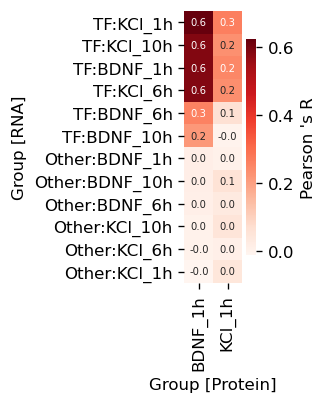

In [69]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 120
rcParams['figure.figsize'] = 8, 3
plt.subplot()
hm.index = hm.index.str.replace('bdnf','BDNF')
# hm = hm[~hm.index.str.contains('log2FC.prot')]
sns.heatmap(hm, cmap='Reds', annot=hm, fmt='.1f', cbar_kws={'label': 'Pearson \'s R'}, annot_kws={'fontsize': 6})
plt.ylabel('Group [RNA]')
plt.xlabel('Group [Protein]')
plt.subplots_adjust(right=.2)
plt.savefig('../data/figures/heatmap_prot_rna.pdf')
plt.xticks(rotation=90)
# plt.close()

plt.show()

In [70]:
import scipy

In [71]:
df3

treatment            bdnf_1h  log2fc.bdnf  log2fc.kcl
external_gene_name                                   
Adnp                0.555693    -0.126927   -0.402967
Adnp2               0.047394    -0.203053   -0.354406
Ahctf1              0.364800     0.026028   -0.203374
Arid2               0.095994     0.051964   -0.079347
Arnt2              -0.066071     0.151300   -0.101294
...                      ...          ...         ...
Zhx2                0.304027     0.304921   -0.136428
Zkscan1            -0.327629    -0.028460   -0.309758
Zkscan3            -0.157604    -0.017888   -0.432363
Zscan21             0.061611     0.115449   -0.131517
Zzz3                0.090554     0.147226   -0.188025

[187 rows x 3 columns]

treatment            bdnf_1h  log2fc.bdnf  log2fc.kcl
external_gene_name                                   
Adnp                0.555693    -0.126927   -0.402967
Adnp2               0.047394    -0.203053   -0.354406
Ahctf1              0.364800     0.026028   -0.203374
Arid2               0.095994     0.051964   -0.079347
Arnt2              -0.066071     0.151300   -0.101294
...                      ...          ...         ...
Zhx2                0.304027     0.304921   -0.136428
Zkscan1            -0.327629    -0.028460   -0.309758
Zkscan3            -0.157604    -0.017888   -0.432363
Zscan21             0.061611     0.115449   -0.131517
Zzz3                0.090554     0.147226   -0.188025

[187 rows x 3 columns]

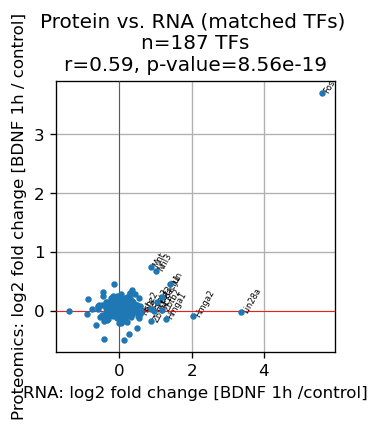

In [100]:
rcParams['figure.figsize'] = 3, 3

ax = plt.subplot()
plt.xlabel('RNA: log2 fold change [BDNF 1h /control]')
plt.ylabel('Proteomics: log2 fold change [BDNF 1h / control]')
plt.grid()

df3['key.sorted'] = df3[['log2fc.bdnf', 'bdnf_1h']].max(axis=1).abs()
df3 = df3.sort_values('key.sorted', ascending=False)
x, y = df3[df3.columns[0]], df3[df3.columns[1]]
r, pval = scipy.stats.pearsonr(x, y)
plt.title('Protein vs. RNA (matched TFs) \nn=%i TFs\nr=%.2f, p-value=%.3g' % (df3.shape[0], r, pval))
plt.scatter(df3[df3.columns[0]], df3[df3.columns[1]], s=8, zorder=12)
plt.axvline(0, c='red', zorder=5, lw=.5)
plt.axhline(0, c='red', zorder=5, lw=.5)


for i, txt in enumerate(df3.head(15).index):
    ax.annotate(txt, (x[i], y[i]), fontsize=5, rotation=60,)
    
plt.savefig('../data/figures/scatter_prot_rna.pdf')
# plt.close()
plt.show()



In [86]:
df3

treatment            bdnf_1h  log2fc.bdnf  log2fc.kcl
external_gene_name                                   
Adnp                0.555693    -0.126927   -0.402967
Adnp2               0.047394    -0.203053   -0.354406
Ahctf1              0.364800     0.026028   -0.203374
Arid2               0.095994     0.051964   -0.079347
Arnt2              -0.066071     0.151300   -0.101294
...                      ...          ...         ...
Zhx2                0.304027     0.304921   -0.136428
Zkscan1            -0.327629    -0.028460   -0.309758
Zkscan3            -0.157604    -0.017888   -0.432363
Zscan21             0.061611     0.115449   -0.131517
Zzz3                0.090554     0.147226   -0.188025

[187 rows x 3 columns]

In [73]:
df3.to_csv('../data/protein_vs_rna.tsv.gz')